# Preparation

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
#import most_ambiguous_points_global
data = pd.read_csv('most_ambiguous_points_global.csv')
# import data_train 
data_train = pd.read_csv('train.csv')
# import data_val
data_valid = pd.read_csv('val.csv')
# import data_test
data_test = pd.read_csv('test.csv')


In [3]:
data.head()

patientid  reldatetime circulatory_state    class   vm1   vm3   vm4   vm5  \
0      19403      85800.0           Failure  Failure  91.0  88.0  44.0  55.0   
1      19403      85800.0           Failure  Failure  91.0  88.0  44.0  55.0   
2      19403      85800.0           Failure  Failure  91.0  88.0  44.0  55.0   
3      19403      85800.0           Failure  Failure  91.0  88.0  44.0  55.0   
4      14929      34500.0           Failure  Failure  80.0  76.5  49.5  59.0   

    vm13  vm20  ...  vm146  vm172      vm174  vm176  pm41  pm42  pm43  pm44  \
0  5.375  43.0  ...    1.0   1.12   8.950597   15.0   0.0   0.0   0.0   0.0   
1  5.300  43.0  ...    1.0   1.12   8.940864   15.0   0.0   0.0   0.0   0.0   
2  5.300  43.0  ...    1.0   1.12   8.950000   15.0   0.0   0.0   0.0   0.0   
3  5.300  43.0  ...    1.0   1.12   8.952320   15.0   0.0   0.0   0.0   0.0   
4  5.375  22.0  ...    1.0   0.95  10.300000    4.0   0.0   0.0   0.0   0.0   

   pm87  ambiguity  
0   0.0   8.602664  
1   0.0   8.601453  
2   0.0   8.601346  
3   0.0   8.601318  
4   0.0   8.600425  

[5 rows x 23 columns]

In [3]:
data_ambiguity_sort = data 

#mélanger data
data = data_ambiguity_sort.sample(frac=1).reset_index(drop=True)


In [4]:
#sélectionner les valeurs failure de data global
data_global_failure = data[data['class'] == 'Failure']

data_global_failure.head()


patientid  reldatetime circulatory_state    class   vm1    vm3   vm4  \
31      13737     107100.0           Failure  Failure  79.0   82.0  45.0   
34      18273     127200.0           Failure  Failure  75.0  112.0  42.0   
53      29630      22500.0           Failure  Failure  63.0   93.0  50.0   
61      24993     611100.0           Failure  Failure  66.0  104.0  42.0   
63      19475     393300.0           Failure  Failure  99.0   94.0  34.0   

     vm5   vm13   vm20  ...  vm146  vm172  vm174  vm176  pm41  pm42  pm43  \
31  59.0  5.300   94.0  ...    1.0   1.03    8.0  245.0   0.0   0.0   0.0   
34  62.0  5.375   98.0  ...    1.0   0.95    9.1    4.0   0.0   0.0   0.0   
53  65.0  5.300  100.0  ...    1.0   1.21    8.7    4.0   0.0   0.0   0.0   
61  64.0  5.200   97.0  ...    1.0   1.02    9.8   35.0   0.0   0.0   0.0   
63  57.0  5.300   95.0  ...    1.0   1.00    7.0  212.0   0.0   0.0   0.0   

    pm44  pm87  ambiguity  
31   0.0   0.0   0.032748  
34   0.0   0.0   0.517099  
53   0.0   1.0   0.673961  
61   0.0   0.0   0.333511  
63   0.0   0.0   0.016796  

[5 rows x 23 columns]

In [6]:
# voir la proportion de failure dans le train set

# voir la proportion de failure dans le train set
data_failure = data_train[data_train['class'] == 'Failure']
#calul proportion failure
print("Pourcentage de données failure dans data_train : ", len(data_failure)/len(data_train)*100)


data_failure = data_test[data_test['class'] == 'Failure']
#calul proportion failure
print("Pourcentage de données failure dans data_test : ", len(data_failure)/len(data_test)*100)

# voir la proportion de failure dans le train set
data_failure = data_valid[data_valid['class'] == 'Failure']
#calul proportion failure
print("Pourcentage de données failure dans data_valid : ", len(data_failure)/len(data_valid)*100)


# voir la proportion de failure dans le data_other set
data_failure = data[data['class'] == 'Failure']
#calul proportion failure
print("Pourcentage de données failure dans data_other : ", len(data_failure)/len(data)*100)


# voir la proportion de failure dans le data_global_failure
data_failure = data_global_failure[data_global_failure['class'] == 'Failure']
#calul proportion failure
print("Pourcentage de données failure dans data_other : ", len(data_failure)/len(data_global_failure)*100)

Pourcentage de données failure dans data_train :  11.184688643727618
Pourcentage de données failure dans data_test :  11.667494128738221
Pourcentage de données failure dans data_valid :  11.542259138807227
Pourcentage de données failure dans data_other :  11.64530199563264
Pourcentage de données failure dans data_other :  100.0


In [7]:
#nombre de données par dataset
print("Nombre de données dans data_train : ", len(data_train))
print("Nombre de données dans data_test : ", len(data_test))
print("Nombre de données dans data_valid : ", len(data_valid))
print("Nombre de données dans data_other : ", len(data))
print("Nombre de données dans data_global_failure : ", len(data_global_failure))

Nombre de données dans data_train :  381155
Nombre de données dans data_test :  358526
Nombre de données dans data_valid :  179263
Nombre de données dans data_other :  34933684
Nombre de données dans data_global_failure :  4068133


In [20]:
data_ambiguity_sort.head()

patientid  reldatetime circulatory_state    class   vm1   vm3   vm4   vm5  \
0      19403      85800.0           Failure  Failure  91.0  88.0  44.0  55.0   
1      19403      85800.0           Failure  Failure  91.0  88.0  44.0  55.0   
2      19403      85800.0           Failure  Failure  91.0  88.0  44.0  55.0   
3      19403      85800.0           Failure  Failure  91.0  88.0  44.0  55.0   
4      14929      34500.0           Failure  Failure  80.0  76.5  49.5  59.0   

    vm13  vm20  ...  vm146  vm172      vm174  vm176  pm41  pm42  pm43  pm44  \
0  5.375  43.0  ...    1.0   1.12   8.950597   15.0   0.0   0.0   0.0   0.0   
1  5.300  43.0  ...    1.0   1.12   8.940864   15.0   0.0   0.0   0.0   0.0   
2  5.300  43.0  ...    1.0   1.12   8.950000   15.0   0.0   0.0   0.0   0.0   
3  5.300  43.0  ...    1.0   1.12   8.952320   15.0   0.0   0.0   0.0   0.0   
4  5.375  22.0  ...    1.0   0.95  10.300000    4.0   0.0   0.0   0.0   0.0   

   pm87  ambiguity  
0   0.0   8.602664  
1   0.0   8.601453  
2   0.0   8.601346  
3   0.0   8.601318  
4   0.0   8.600425  

[5 rows x 23 columns]

In [25]:
#afficher la moyenne des ambiguités 
print("Moyenne des ambiguités : ", data_ambiguity_sort['ambiguity'].mean())
#afficher la moyenne des ambiguités pour les données failure
print("Moyenne des ambiguités pour les données failure : ", data_ambiguity_sort[data_ambiguity_sort['class'] == 'Failure']['ambiguity'].mean())
#afficher la moyenne des ambiguités pour les données non failure
print("Moyenne des ambiguités pour les données non failure : ", data_ambiguity_sort[data_ambiguity_sort['class'] == 'Stable']['ambiguity'].mean())
#variance
print("Variance des ambiguités : ", data_ambiguity_sort['ambiguity'].var())
#variance
print("Variance des ambiguités pour les données failure : ", data_ambiguity_sort[data_ambiguity_sort['class'] == 'Failure']['ambiguity'].var())
#variance
print("Variance des ambiguités pour les données non failure : ", data_ambiguity_sort[data_ambiguity_sort['class'] == 'Stable']['ambiguity'].var())


Moyenne des ambiguités :  0.5605666145136201
Moyenne des ambiguités pour les données failure :  0.7189773707488138
Moyenne des ambiguités pour les données non failure :  0.5396878028904568
Variance des ambiguités :  0.39580721849315276
Variance des ambiguités pour les données failure :  0.8188806414100357
Variance des ambiguités pour les données non failure :  0.3363020811883848


In [27]:
#médiane
print("Médiane des ambiguités : ", data_ambiguity_sort['ambiguity'].median())
#médiane
print("Médiane des ambiguités pour les données failure : ", data_ambiguity_sort[data_ambiguity_sort['class'] == 'Failure']['ambiguity'].median())
#médiane
print("Médiane des ambiguités pour les données non failure : ", data_ambiguity_sort[data_ambiguity_sort['class'] == 'Stable']['ambiguity'].median())
#min max 
print("Min des ambiguités : ", data_ambiguity_sort['ambiguity'].min())
print("Max des ambiguités : ", data_ambiguity_sort['ambiguity'].max())
#min max pour données failure
print("Min des ambiguités pour les données failure : ", data_ambiguity_sort[data_ambiguity_sort['class'] == 'Failure']['ambiguity'].min())
print("Max des ambiguités pour les données failure : ", data_ambiguity_sort[data_ambiguity_sort['class'] == 'Failure']['ambiguity'].max())
#min max pour données non failure
print("Min des ambiguités pour les données non failure : ", data_ambiguity_sort[data_ambiguity_sort['class'] == 'Stable']['ambiguity'].min())
print("Max des ambiguités pour les données non failure : ", data_ambiguity_sort[data_ambiguity_sort['class'] == 'Stable']['ambiguity'].max())


Médiane des ambiguités :  0.4137296184991488
Médiane des ambiguités pour les données failure :  0.4886920765273821
Médiane des ambiguités pour les données non failure :  0.4050600520111289
Min des ambiguités :  1.8364289200434317e-08
Max des ambiguités :  8.602664077814296
Min des ambiguités pour les données failure :  4.5934188008800454e-08
Max des ambiguités pour les données failure :  8.602664077814296
Min des ambiguités pour les données non failure :  1.8364289200434317e-08
Max des ambiguités pour les données non failure :  8.573465773607454


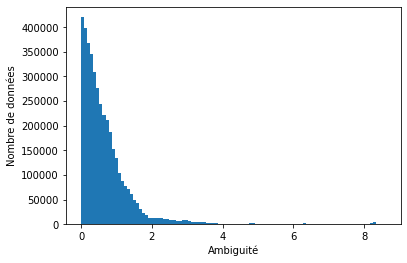

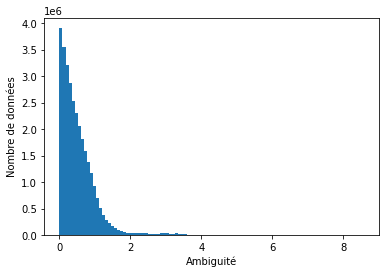

In [29]:
#afficher historigram de l'ambiguité des données failure
plt.hist(data_ambiguity_sort[data_ambiguity_sort['class'] == 'Failure']['ambiguity'], bins=100)
# plt.title("Histogramme de l'ambiguité des données failure")
plt.xlabel("Ambiguité")
plt.ylabel("Nombre de données")
plt.show()

#afficher historigram de l'ambiguité des données non failure
plt.hist(data_ambiguity_sort[data_ambiguity_sort['class'] == 'Stable']['ambiguity'], bins=100)
# plt.title("Histogramme de l'ambiguité des données non failure")
plt.xlabel("Ambiguité")
plt.ylabel("Nombre de données")
plt.show()

# Normalisation

In [5]:
# choisi les colonnes
columns_to_cluster = ['vm1', 'vm3', 'vm4', 'vm5', 'vm13', 'vm20', 'vm28', 'vm62', 'vm136', 'vm146', 'vm172', 'vm174', 'vm176', 'pm41', 'pm42', 'pm43', 'pm44', 'pm87']
data_to_cluster_train = data_train[columns_to_cluster]
data_to_cluster_valid = data_valid[columns_to_cluster]
data_to_cluster_test = data_test[columns_to_cluster]
data_to_cluster_other = data[columns_to_cluster]

# normalise
# Normalisation
scaler = StandardScaler()
# Utilisez uniquement l'ensemble d'entraînement pour le fit
scaler.fit(data_to_cluster_train)

# Transformez tous les ensembles de données en utilisant les statistiques de l'ensemble d'entraînement
scaled_data_train = scaler.transform(data_to_cluster_train)
scaled_data_valid = scaler.transform(data_to_cluster_valid)
scaled_data_test = scaler.transform(data_to_cluster_test)
scaled_data_global = scaler.transform(data_to_cluster_other)



#add special dataset
data_to_cluster_other_failure = data_global_failure[columns_to_cluster]

# Transformez tous les ensembles de données en utilisant les statistiques de l'ensemble d'entraînement
scaled_data_other_failure = scaler.transform(data_to_cluster_other_failure)

# Active learning

les étapes  pour l'apprentissage avec l'apprentissage actif:

- crée modèle ou prendre modèle existant, frise et réentrainement (attention au surapprentissage)
SVM, Random Forest, k-NN ou CNN

- utiliser un pourcentage de données labélisé 1% pour l'entrainement initial
- évaluer les performances : métriques telles que la précision, le rappel, la F-mesure, l'AUC-ROC
- visualiser les clusters avec valeurs annotées. (utiliser PCA pour visualiser en 2D ou 3D)
-mettre à jour le modèle avec les nouvelles annotations--> réentrainement
- évaluer les performances :métriques telles que la précision, le rappel, la F-mesure, l'AUC-ROC
boucles jusqu'à performances satisfaisant:
    - identificationd des éléments incertains avec ce nouveeau modèle
    - -mettre à jour le modèle avec les nouvelles annotations--> réentrainement
    - évaluer les performances : métriques telles que la précision, le rappel, la F-mesure, l'AUC-ROC


1% patient 

### Sélection d'un modèle

- Accuracy : proportion de prédictions correctes
- Précision : proportion de vrais positifs parmi les prédictions positives
- Rappel : proportion de vrais positifs correctement identifiés
- F-mesure : mesure pondérée de précision et rappel
- AUC-ROC : capacité à distinguer les échantillons positifs et négatifs


# Implémenter l'apprentissage actif (itérations, annotation, mise à jour du modèle et évaluation)

randomforestClassifier ne supporte pas le réentrainement

les autres modèles de classification

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_performance_active(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    return accuracy, precision, recall, f1

In [17]:
num_samples = int(len(data) * 0.002)  # 0.2% of the data to add at each iteration
most_ambiguous_data = data_ambiguity_sort.iloc[:num_samples]
print(len(most_ambiguous_data))
most_ambiguous_data.head()

69867


patientid  reldatetime circulatory_state    class   vm1   vm3   vm4   vm5  \
0      19403      85800.0           Failure  Failure  91.0  88.0  44.0  55.0   
1      19403      85800.0           Failure  Failure  91.0  88.0  44.0  55.0   
2      19403      85800.0           Failure  Failure  91.0  88.0  44.0  55.0   
3      19403      85800.0           Failure  Failure  91.0  88.0  44.0  55.0   
4      14929      34500.0           Failure  Failure  80.0  76.5  49.5  59.0   

    vm13  vm20  ...  vm146  vm172      vm174  vm176  pm41  pm42  pm43  pm44  \
0  5.375  43.0  ...    1.0   1.12   8.950597   15.0   0.0   0.0   0.0   0.0   
1  5.300  43.0  ...    1.0   1.12   8.940864   15.0   0.0   0.0   0.0   0.0   
2  5.300  43.0  ...    1.0   1.12   8.950000   15.0   0.0   0.0   0.0   0.0   
3  5.300  43.0  ...    1.0   1.12   8.952320   15.0   0.0   0.0   0.0   0.0   
4  5.375  22.0  ...    1.0   0.95  10.300000    4.0   0.0   0.0   0.0   0.0   

   pm87  ambiguity  
0   0.0   8.602664  
1   0.0   8.601453  
2   0.0   8.601346  
3   0.0   8.601318  
4   0.0   8.600425  

[5 rows x 23 columns]

descending

Active Learning Iterations:   1%|          | 1/100 [00:08<13:45,  8.34s/it]

Performance on test data: Accuracy=0.965, Precision=0.908, Recall=0.927, F1=0.917



Active Learning Iterations:   2%|▏         | 2/100 [00:17<14:42,  9.01s/it]

Performance on test data: Accuracy=0.964, Precision=0.919, Recall=0.903, F1=0.911



Active Learning Iterations:   3%|▎         | 3/100 [00:30<17:02, 10.54s/it]

Performance on test data: Accuracy=0.965, Precision=0.920, Recall=0.910, F1=0.915



Active Learning Iterations:   4%|▍         | 4/100 [00:46<20:45, 12.97s/it]

Performance on test data: Accuracy=0.966, Precision=0.919, Recall=0.916, F1=0.918



Active Learning Iterations:   5%|▌         | 5/100 [01:05<23:33, 14.88s/it]

Performance on test data: Accuracy=0.965, Precision=0.917, Recall=0.911, F1=0.914



Active Learning Iterations:   6%|▌         | 6/100 [01:27<27:33, 17.59s/it]

Performance on test data: Accuracy=0.964, Precision=0.916, Recall=0.908, F1=0.912



Active Learning Iterations:   7%|▋         | 7/100 [02:05<37:06, 23.94s/it]

Performance on test data: Accuracy=0.961, Precision=0.912, Recall=0.897, F1=0.905



Active Learning Iterations:   8%|▊         | 8/100 [02:31<37:51, 24.69s/it]

Performance on test data: Accuracy=0.963, Precision=0.918, Recall=0.901, F1=0.909



Active Learning Iterations:   9%|▉         | 9/100 [03:11<44:38, 29.43s/it]

Performance on test data: Accuracy=0.965, Precision=0.924, Recall=0.901, F1=0.912



Active Learning Iterations:  10%|█         | 10/100 [03:40<44:19, 29.55s/it]

Performance on test data: Accuracy=0.964, Precision=0.918, Recall=0.906, F1=0.912



Active Learning Iterations:  11%|█         | 11/100 [04:06<42:07, 28.40s/it]

Performance on test data: Accuracy=0.964, Precision=0.919, Recall=0.905, F1=0.912



Active Learning Iterations:  12%|█▏        | 12/100 [04:33<40:57, 27.92s/it]

Performance on test data: Accuracy=0.965, Precision=0.919, Recall=0.906, F1=0.913



Active Learning Iterations:  13%|█▎        | 13/100 [04:50<35:47, 24.68s/it]

Performance on test data: Accuracy=0.964, Precision=0.924, Recall=0.899, F1=0.911



Active Learning Iterations:  14%|█▍        | 14/100 [05:16<35:47, 24.98s/it]

Performance on test data: Accuracy=0.964, Precision=0.920, Recall=0.901, F1=0.910



Active Learning Iterations:  15%|█▌        | 15/100 [05:48<38:12, 26.97s/it]

Performance on test data: Accuracy=0.964, Precision=0.919, Recall=0.904, F1=0.911



Active Learning Iterations:  16%|█▌        | 16/100 [06:45<50:33, 36.12s/it]

Performance on test data: Accuracy=0.965, Precision=0.924, Recall=0.904, F1=0.914



Active Learning Iterations:  17%|█▋        | 17/100 [07:14<46:52, 33.88s/it]

Performance on test data: Accuracy=0.964, Precision=0.920, Recall=0.901, F1=0.911



Active Learning Iterations:  18%|█▊        | 18/100 [07:40<43:06, 31.54s/it]

Performance on test data: Accuracy=0.964, Precision=0.926, Recall=0.898, F1=0.911



Active Learning Iterations:  19%|█▉        | 19/100 [08:01<38:13, 28.32s/it]

Performance on test data: Accuracy=0.964, Precision=0.927, Recall=0.891, F1=0.908



Active Learning Iterations:  20%|██        | 20/100 [08:17<33:13, 24.92s/it]

Performance on test data: Accuracy=0.964, Precision=0.926, Recall=0.894, F1=0.909



Active Learning Iterations:  21%|██        | 21/100 [08:36<30:21, 23.06s/it]

Performance on test data: Accuracy=0.964, Precision=0.926, Recall=0.892, F1=0.908



Active Learning Iterations:  22%|██▏       | 22/100 [08:55<28:17, 21.77s/it]

Performance on test data: Accuracy=0.963, Precision=0.928, Recall=0.886, F1=0.906



Active Learning Iterations:  23%|██▎       | 23/100 [09:07<24:10, 18.84s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.899, F1=0.911



Active Learning Iterations:  24%|██▍       | 24/100 [10:18<43:32, 34.37s/it]

Performance on test data: Accuracy=0.964, Precision=0.926, Recall=0.897, F1=0.911



Active Learning Iterations:  25%|██▌       | 25/100 [10:33<35:46, 28.62s/it]

Performance on test data: Accuracy=0.964, Precision=0.926, Recall=0.893, F1=0.909



Active Learning Iterations:  26%|██▌       | 26/100 [11:36<48:10, 39.07s/it]

Performance on test data: Accuracy=0.964, Precision=0.926, Recall=0.896, F1=0.910



Active Learning Iterations:  27%|██▋       | 27/100 [11:51<38:39, 31.77s/it]

Performance on test data: Accuracy=0.964, Precision=0.925, Recall=0.895, F1=0.909



Active Learning Iterations:  28%|██▊       | 28/100 [12:54<49:21, 41.14s/it]

Performance on test data: Accuracy=0.964, Precision=0.926, Recall=0.896, F1=0.910



Active Learning Iterations:  29%|██▉       | 29/100 [13:10<39:52, 33.69s/it]

Performance on test data: Accuracy=0.964, Precision=0.925, Recall=0.898, F1=0.911



Active Learning Iterations:  30%|███       | 30/100 [13:24<32:16, 27.67s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.900, F1=0.912



Active Learning Iterations:  31%|███       | 31/100 [13:53<32:20, 28.13s/it]

Performance on test data: Accuracy=0.964, Precision=0.926, Recall=0.893, F1=0.909



Active Learning Iterations:  32%|███▏      | 32/100 [14:07<26:54, 23.74s/it]

Performance on test data: Accuracy=0.965, Precision=0.924, Recall=0.903, F1=0.913



Active Learning Iterations:  33%|███▎      | 33/100 [14:22<23:45, 21.28s/it]

Performance on test data: Accuracy=0.963, Precision=0.927, Recall=0.890, F1=0.907



Active Learning Iterations:  34%|███▍      | 34/100 [14:38<21:46, 19.79s/it]

Performance on test data: Accuracy=0.964, Precision=0.926, Recall=0.894, F1=0.909



Active Learning Iterations:  35%|███▌      | 35/100 [15:14<26:23, 24.36s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.898, F1=0.911



Active Learning Iterations:  36%|███▌      | 36/100 [15:29<23:01, 21.59s/it]

Performance on test data: Accuracy=0.964, Precision=0.927, Recall=0.890, F1=0.908



Active Learning Iterations:  37%|███▋      | 37/100 [16:32<35:43, 34.02s/it]

Performance on test data: Accuracy=0.964, Precision=0.925, Recall=0.896, F1=0.910



Active Learning Iterations:  38%|███▊      | 38/100 [16:48<29:35, 28.63s/it]

Performance on test data: Accuracy=0.964, Precision=0.926, Recall=0.892, F1=0.908



Active Learning Iterations:  39%|███▉      | 39/100 [17:04<25:24, 24.99s/it]

Performance on test data: Accuracy=0.964, Precision=0.926, Recall=0.894, F1=0.909



Active Learning Iterations:  40%|████      | 40/100 [17:19<22:04, 22.07s/it]

Performance on test data: Accuracy=0.964, Precision=0.926, Recall=0.895, F1=0.910



Active Learning Iterations:  41%|████      | 41/100 [18:25<34:22, 34.96s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.899, F1=0.912



Active Learning Iterations:  42%|████▏     | 42/100 [18:47<30:06, 31.15s/it]

Performance on test data: Accuracy=0.965, Precision=0.924, Recall=0.899, F1=0.911



Active Learning Iterations:  43%|████▎     | 43/100 [19:01<24:49, 26.13s/it]

Performance on test data: Accuracy=0.964, Precision=0.925, Recall=0.897, F1=0.911



Active Learning Iterations:  44%|████▍     | 44/100 [19:35<26:29, 28.38s/it]

Performance on test data: Accuracy=0.964, Precision=0.926, Recall=0.895, F1=0.910



Active Learning Iterations:  45%|████▌     | 45/100 [20:15<29:08, 31.79s/it]

Performance on test data: Accuracy=0.964, Precision=0.925, Recall=0.897, F1=0.910



Active Learning Iterations:  46%|████▌     | 46/100 [21:50<45:55, 51.03s/it]

Performance on test data: Accuracy=0.964, Precision=0.925, Recall=0.899, F1=0.911



Active Learning Iterations:  47%|████▋     | 47/100 [23:20<55:12, 62.50s/it]

Performance on test data: Accuracy=0.964, Precision=0.925, Recall=0.897, F1=0.911



Active Learning Iterations:  48%|████▊     | 48/100 [23:36<42:01, 48.49s/it]

Performance on test data: Accuracy=0.965, Precision=0.924, Recall=0.904, F1=0.913



Active Learning Iterations:  49%|████▉     | 49/100 [23:52<33:04, 38.91s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.901, F1=0.912



Active Learning Iterations:  50%|█████     | 50/100 [25:00<39:43, 47.66s/it]

Performance on test data: Accuracy=0.964, Precision=0.925, Recall=0.898, F1=0.911



Active Learning Iterations:  51%|█████     | 51/100 [26:08<43:49, 53.65s/it]

Performance on test data: Accuracy=0.965, Precision=0.924, Recall=0.900, F1=0.912



Active Learning Iterations:  52%|█████▏    | 52/100 [27:16<46:21, 57.95s/it]

Performance on test data: Accuracy=0.965, Precision=0.924, Recall=0.904, F1=0.913



Active Learning Iterations:  53%|█████▎    | 53/100 [28:24<47:45, 60.96s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.900, F1=0.912



Active Learning Iterations:  54%|█████▍    | 54/100 [29:31<48:16, 62.96s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.899, F1=0.912



Active Learning Iterations:  55%|█████▌    | 55/100 [29:58<38:56, 51.92s/it]

Performance on test data: Accuracy=0.964, Precision=0.925, Recall=0.897, F1=0.910



Active Learning Iterations:  56%|█████▌    | 56/100 [30:19<31:19, 42.71s/it]

Performance on test data: Accuracy=0.964, Precision=0.926, Recall=0.897, F1=0.911



Active Learning Iterations:  57%|█████▋    | 57/100 [30:45<26:59, 37.66s/it]

Performance on test data: Accuracy=0.965, Precision=0.924, Recall=0.901, F1=0.912



Active Learning Iterations:  58%|█████▊    | 58/100 [31:56<33:21, 47.65s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.902, F1=0.913



Active Learning Iterations:  59%|█████▉    | 59/100 [32:54<34:40, 50.74s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.900, F1=0.912



Active Learning Iterations:  60%|██████    | 60/100 [33:12<27:19, 40.99s/it]

Performance on test data: Accuracy=0.964, Precision=0.926, Recall=0.897, F1=0.911



Active Learning Iterations:  61%|██████    | 61/100 [33:30<22:15, 34.24s/it]

Performance on test data: Accuracy=0.964, Precision=0.926, Recall=0.895, F1=0.910



Active Learning Iterations:  62%|██████▏   | 62/100 [33:49<18:42, 29.53s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.901, F1=0.912



Active Learning Iterations:  63%|██████▎   | 63/100 [35:01<26:06, 42.33s/it]

Performance on test data: Accuracy=0.965, Precision=0.924, Recall=0.904, F1=0.914



Active Learning Iterations:  64%|██████▍   | 64/100 [35:22<21:35, 36.00s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.899, F1=0.912



Active Learning Iterations:  65%|██████▌   | 65/100 [35:57<20:47, 35.65s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.906, F1=0.915



Active Learning Iterations:  66%|██████▌   | 66/100 [36:20<18:04, 31.89s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.901, F1=0.913



Active Learning Iterations:  67%|██████▋   | 67/100 [38:39<35:13, 64.05s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.902, F1=0.913



Active Learning Iterations:  68%|██████▊   | 68/100 [39:00<27:15, 51.11s/it]

Performance on test data: Accuracy=0.965, Precision=0.924, Recall=0.903, F1=0.913



Active Learning Iterations:  69%|██████▉   | 69/100 [40:22<31:06, 60.22s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.904, F1=0.914



Active Learning Iterations:  70%|███████   | 70/100 [41:34<31:55, 63.85s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.904, F1=0.914



Active Learning Iterations:  71%|███████   | 71/100 [42:49<32:26, 67.13s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.904, F1=0.914



Active Learning Iterations:  72%|███████▏  | 72/100 [44:02<32:12, 69.03s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.905, F1=0.915



Active Learning Iterations:  73%|███████▎  | 73/100 [44:30<25:29, 56.63s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.903, F1=0.913



Active Learning Iterations:  74%|███████▍  | 74/100 [44:56<20:29, 47.30s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.903, F1=0.913



Active Learning Iterations:  75%|███████▌  | 75/100 [46:09<22:58, 55.15s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.905, F1=0.914



Active Learning Iterations:  76%|███████▌  | 76/100 [46:32<18:12, 45.54s/it]

Performance on test data: Accuracy=0.966, Precision=0.925, Recall=0.905, F1=0.914



Active Learning Iterations:  77%|███████▋  | 77/100 [47:02<15:40, 40.90s/it]

Performance on test data: Accuracy=0.965, Precision=0.924, Recall=0.905, F1=0.914



Active Learning Iterations:  78%|███████▊  | 78/100 [47:27<13:14, 36.10s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.902, F1=0.913



Active Learning Iterations:  79%|███████▉  | 79/100 [48:40<16:27, 47.03s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.902, F1=0.913



Active Learning Iterations:  80%|████████  | 80/100 [49:42<17:10, 51.51s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.902, F1=0.913



Active Learning Iterations:  81%|████████  | 81/100 [50:15<14:35, 46.08s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.903, F1=0.913



Active Learning Iterations:  82%|████████▏ | 82/100 [51:28<16:13, 54.08s/it]

Performance on test data: Accuracy=0.965, Precision=0.924, Recall=0.905, F1=0.914



Active Learning Iterations:  83%|████████▎ | 83/100 [51:49<12:34, 44.38s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.908, F1=0.915



Active Learning Iterations:  84%|████████▍ | 84/100 [53:04<14:15, 53.50s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.906, F1=0.915



Active Learning Iterations:  85%|████████▌ | 85/100 [54:18<14:52, 59.49s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.906, F1=0.915



Active Learning Iterations:  86%|████████▌ | 86/100 [54:45<11:35, 49.69s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.900, F1=0.912



Active Learning Iterations:  87%|████████▋ | 87/100 [55:56<12:10, 56.22s/it]

Performance on test data: Accuracy=0.965, Precision=0.924, Recall=0.903, F1=0.913



Active Learning Iterations:  88%|████████▊ | 88/100 [56:23<09:30, 47.56s/it]

Performance on test data: Accuracy=0.965, Precision=0.926, Recall=0.901, F1=0.912



Active Learning Iterations:  89%|████████▉ | 89/100 [56:47<07:25, 40.51s/it]

Performance on test data: Accuracy=0.965, Precision=0.924, Recall=0.904, F1=0.914



Active Learning Iterations:  90%|█████████ | 90/100 [57:33<06:59, 41.94s/it]

Performance on test data: Accuracy=0.965, Precision=0.924, Recall=0.905, F1=0.914



Active Learning Iterations:  91%|█████████ | 91/100 [58:44<07:37, 50.81s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.904, F1=0.914



Active Learning Iterations:  92%|█████████▏| 92/100 [59:57<07:38, 57.29s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.904, F1=0.914



Active Learning Iterations:  93%|█████████▎| 93/100 [1:01:08<07:10, 61.54s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.907, F1=0.915



Active Learning Iterations:  94%|█████████▍| 94/100 [1:02:22<06:31, 65.18s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.904, F1=0.914



Active Learning Iterations:  95%|█████████▌| 95/100 [1:03:00<04:45, 57.04s/it]

Performance on test data: Accuracy=0.965, Precision=0.924, Recall=0.904, F1=0.913



Active Learning Iterations:  96%|█████████▌| 96/100 [1:04:15<04:09, 62.45s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.901, F1=0.913



Active Learning Iterations:  97%|█████████▋| 97/100 [1:05:31<03:20, 66.67s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.906, F1=0.915



Active Learning Iterations:  98%|█████████▊| 98/100 [1:06:49<02:19, 69.85s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.906, F1=0.915



Active Learning Iterations:  99%|█████████▉| 99/100 [1:09:00<01:28, 88.18s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.905, F1=0.915



Active Learning Iterations: 100%|██████████| 100/100 [1:10:16<00:00, 42.17s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.903, F1=0.913



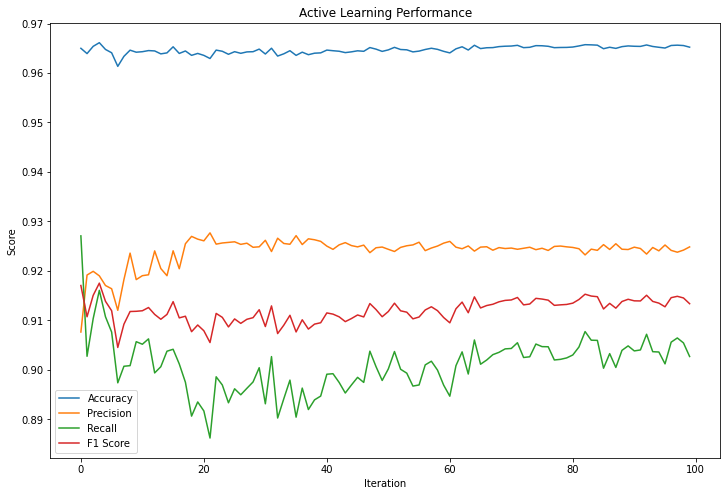

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Begin active learning
num_iter = 100  # number of iterations for active learning
num_samples = int(len(data) * 0.002)  # 0.2% of the data to add at each iteration

# Shuffle data
data = data.sample(frac=1, random_state=1)

# Sort data based on 'ambiguity' column and reset index
data_ambiguity_sort = data.sort_values(by='ambiguity', ascending=False).reset_index(drop=True)

# Copy the original training data
scaled_data_train_active = scaled_data_train.copy()
data_train_active = data_train.copy()

# Initialize model
sgd_model = SGDClassifier(loss='hinge', alpha=0.0001, penalty='l1', random_state=1)

# Initialize lists to store metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for i in tqdm(range(num_iter), desc="Active Learning Iterations"):
    # Fit the model on the current training data
    sgd_model.fit(scaled_data_train_active, data_train_active['class'])

    # Select the most ambiguous data samples
    most_ambiguous_data = data_ambiguity_sort.iloc[:num_samples]
    most_ambiguous_data.head()

    # Remove these samples from the global data
    data_ambiguity_sort = data_ambiguity_sort.iloc[num_samples:]

    # Add the most ambiguous data to the training data
    data_train_active = pd.concat([data_train_active, most_ambiguous_data])
    scaled_data_train_active = np.concatenate([scaled_data_train_active, scaler.transform(most_ambiguous_data[columns_to_cluster])])

    # Evaluate the model's performance on the test data
    y_pred_test = sgd_model.predict(scaled_data_test)
    accuracy, precision, recall, f1 = evaluate_performance_active(data_test['class'], y_pred_test)
    print(f"Performance on test data: Accuracy={accuracy:.3f}, Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}\n")

    # Store metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Plot metrics
plt.figure(figsize=(12, 8))
plt.plot(range(num_iter), accuracy_list, label='Accuracy')
plt.plot(range(num_iter), precision_list, label='Precision')
plt.plot(range(num_iter), recall_list, label='Recall')
plt.plot(range(num_iter), f1_list, label='F1 Score')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.title('Active Learning Performance')
plt.show()


entrainnement avec classe minoritaire =? question

facile à prédire (18 classes, seulement 9 données), très ponctuelle--> trop informations local

dans 4h 

difficile à améliorer, les données déjà représentatif

error pas du au modèle mais à cause de la fenetre

comparer les méthodes de sélection avec les premiers, seul facon de comparer, qui change beaucoup, valeurs finals,--> dépend grandement du projet 

piste à explorer :
    méthode permettrait 
    300 itération
    entrainement avec toutes les données
    mesurer -> problème plus difficile 


réunion : pas besoin
date de défence : 
yverdon

72 minutes

ascending

Active Learning Iterations:   1%|          | 1/100 [00:13<21:28, 13.01s/it]

Performance on test data: Accuracy=0.965, Precision=0.908, Recall=0.927, F1=0.917



Active Learning Iterations:   2%|▏         | 2/100 [00:19<15:21,  9.41s/it]

Performance on test data: Accuracy=0.966, Precision=0.918, Recall=0.915, F1=0.916



Active Learning Iterations:   3%|▎         | 3/100 [00:27<13:50,  8.56s/it]

Performance on test data: Accuracy=0.965, Precision=0.916, Recall=0.913, F1=0.914



Active Learning Iterations:   4%|▍         | 4/100 [00:34<12:41,  7.93s/it]

Performance on test data: Accuracy=0.964, Precision=0.921, Recall=0.902, F1=0.912



Active Learning Iterations:   5%|▌         | 5/100 [00:41<12:13,  7.72s/it]

Performance on test data: Accuracy=0.965, Precision=0.918, Recall=0.914, F1=0.916



Active Learning Iterations:   6%|▌         | 6/100 [00:50<12:43,  8.12s/it]

Performance on test data: Accuracy=0.966, Precision=0.918, Recall=0.919, F1=0.919



Active Learning Iterations:   7%|▋         | 7/100 [01:02<14:22,  9.28s/it]

Performance on test data: Accuracy=0.966, Precision=0.920, Recall=0.913, F1=0.916



Active Learning Iterations:   8%|▊         | 8/100 [01:09<13:20,  8.71s/it]

Performance on test data: Accuracy=0.966, Precision=0.921, Recall=0.911, F1=0.916



Active Learning Iterations:   9%|▉         | 9/100 [01:21<14:48,  9.76s/it]

Performance on test data: Accuracy=0.965, Precision=0.923, Recall=0.902, F1=0.912



Active Learning Iterations:  10%|█         | 10/100 [01:33<15:35, 10.40s/it]

Performance on test data: Accuracy=0.966, Precision=0.920, Recall=0.914, F1=0.917



Active Learning Iterations:  11%|█         | 11/100 [01:41<14:18,  9.64s/it]

Performance on test data: Accuracy=0.965, Precision=0.922, Recall=0.908, F1=0.915



Active Learning Iterations:  12%|█▏        | 12/100 [01:51<14:09,  9.65s/it]

Performance on test data: Accuracy=0.967, Precision=0.921, Recall=0.919, F1=0.920



Active Learning Iterations:  13%|█▎        | 13/100 [02:00<13:58,  9.64s/it]

Performance on test data: Accuracy=0.965, Precision=0.924, Recall=0.904, F1=0.914



Active Learning Iterations:  14%|█▍        | 14/100 [02:10<13:37,  9.50s/it]

Performance on test data: Accuracy=0.966, Precision=0.922, Recall=0.909, F1=0.916



Active Learning Iterations:  15%|█▌        | 15/100 [02:26<16:14, 11.46s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.909, F1=0.916



Active Learning Iterations:  16%|█▌        | 16/100 [02:35<15:06, 10.79s/it]

Performance on test data: Accuracy=0.966, Precision=0.922, Recall=0.910, F1=0.916



Active Learning Iterations:  17%|█▋        | 17/100 [02:44<14:21, 10.38s/it]

Performance on test data: Accuracy=0.967, Precision=0.921, Recall=0.916, F1=0.918



Active Learning Iterations:  18%|█▊        | 18/100 [03:02<17:15, 12.63s/it]

Performance on test data: Accuracy=0.966, Precision=0.922, Recall=0.911, F1=0.917



Active Learning Iterations:  19%|█▉        | 19/100 [03:12<15:50, 11.73s/it]

Performance on test data: Accuracy=0.966, Precision=0.921, Recall=0.912, F1=0.917



Active Learning Iterations:  20%|██        | 20/100 [03:22<14:51, 11.14s/it]

Performance on test data: Accuracy=0.965, Precision=0.924, Recall=0.901, F1=0.912



Active Learning Iterations:  21%|██        | 21/100 [03:33<14:45, 11.21s/it]

Performance on test data: Accuracy=0.967, Precision=0.920, Recall=0.918, F1=0.919



Active Learning Iterations:  22%|██▏       | 22/100 [03:44<14:30, 11.16s/it]

Performance on test data: Accuracy=0.966, Precision=0.921, Recall=0.914, F1=0.918



Active Learning Iterations:  23%|██▎       | 23/100 [04:05<18:06, 14.11s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.911, F1=0.917



Active Learning Iterations:  24%|██▍       | 24/100 [04:15<16:25, 12.97s/it]

Performance on test data: Accuracy=0.965, Precision=0.924, Recall=0.900, F1=0.912



Active Learning Iterations:  25%|██▌       | 25/100 [04:26<15:17, 12.23s/it]

Performance on test data: Accuracy=0.967, Precision=0.922, Recall=0.915, F1=0.918



Active Learning Iterations:  26%|██▌       | 26/100 [04:37<14:33, 11.80s/it]

Performance on test data: Accuracy=0.966, Precision=0.922, Recall=0.912, F1=0.917



Active Learning Iterations:  27%|██▋       | 27/100 [05:00<18:37, 15.30s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.910, F1=0.916



Active Learning Iterations:  28%|██▊       | 28/100 [05:11<16:48, 14.00s/it]

Performance on test data: Accuracy=0.967, Precision=0.923, Recall=0.915, F1=0.919



Active Learning Iterations:  29%|██▉       | 29/100 [05:22<15:39, 13.23s/it]

Performance on test data: Accuracy=0.967, Precision=0.921, Recall=0.916, F1=0.918



Active Learning Iterations:  30%|███       | 30/100 [05:48<19:39, 16.85s/it]

Performance on test data: Accuracy=0.967, Precision=0.922, Recall=0.916, F1=0.919



Active Learning Iterations:  31%|███       | 31/100 [06:00<17:44, 15.43s/it]

Performance on test data: Accuracy=0.965, Precision=0.923, Recall=0.902, F1=0.912



Active Learning Iterations:  32%|███▏      | 32/100 [06:12<16:18, 14.39s/it]

Performance on test data: Accuracy=0.965, Precision=0.923, Recall=0.906, F1=0.914



Active Learning Iterations:  33%|███▎      | 33/100 [06:24<15:17, 13.70s/it]

Performance on test data: Accuracy=0.966, Precision=0.922, Recall=0.912, F1=0.917



Active Learning Iterations:  34%|███▍      | 34/100 [06:37<14:50, 13.50s/it]

Performance on test data: Accuracy=0.967, Precision=0.921, Recall=0.917, F1=0.919



Active Learning Iterations:  35%|███▌      | 35/100 [06:49<14:14, 13.14s/it]

Performance on test data: Accuracy=0.966, Precision=0.921, Recall=0.913, F1=0.917



Active Learning Iterations:  36%|███▌      | 36/100 [07:05<14:44, 13.81s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.907, F1=0.915



Active Learning Iterations:  37%|███▋      | 37/100 [07:17<14:08, 13.47s/it]

Performance on test data: Accuracy=0.966, Precision=0.922, Recall=0.913, F1=0.917



Active Learning Iterations:  38%|███▊      | 38/100 [07:30<13:44, 13.30s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.907, F1=0.915



Active Learning Iterations:  39%|███▉      | 39/100 [07:43<13:23, 13.16s/it]

Performance on test data: Accuracy=0.965, Precision=0.924, Recall=0.900, F1=0.912



Active Learning Iterations:  40%|████      | 40/100 [07:57<13:32, 13.55s/it]

Performance on test data: Accuracy=0.966, Precision=0.922, Recall=0.912, F1=0.917



Active Learning Iterations:  41%|████      | 41/100 [08:11<13:13, 13.44s/it]

Performance on test data: Accuracy=0.966, Precision=0.921, Recall=0.914, F1=0.918



Active Learning Iterations:  42%|████▏     | 42/100 [08:24<13:00, 13.46s/it]

Performance on test data: Accuracy=0.966, Precision=0.922, Recall=0.911, F1=0.917



Active Learning Iterations:  43%|████▎     | 43/100 [08:38<12:48, 13.49s/it]

Performance on test data: Accuracy=0.967, Precision=0.922, Recall=0.917, F1=0.919



Active Learning Iterations:  44%|████▍     | 44/100 [08:52<12:46, 13.68s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.908, F1=0.915



Active Learning Iterations:  45%|████▌     | 45/100 [09:06<12:36, 13.75s/it]

Performance on test data: Accuracy=0.967, Precision=0.921, Recall=0.916, F1=0.919



Active Learning Iterations:  46%|████▌     | 46/100 [09:20<12:27, 13.85s/it]

Performance on test data: Accuracy=0.965, Precision=0.923, Recall=0.907, F1=0.915



Active Learning Iterations:  47%|████▋     | 47/100 [09:34<12:19, 13.96s/it]

Performance on test data: Accuracy=0.965, Precision=0.923, Recall=0.905, F1=0.914



Active Learning Iterations:  48%|████▊     | 48/100 [09:49<12:15, 14.14s/it]

Performance on test data: Accuracy=0.967, Precision=0.922, Recall=0.916, F1=0.919



Active Learning Iterations:  49%|████▉     | 49/100 [10:03<12:06, 14.24s/it]

Performance on test data: Accuracy=0.966, Precision=0.922, Recall=0.912, F1=0.917



Active Learning Iterations:  50%|█████     | 50/100 [10:18<12:01, 14.43s/it]

Performance on test data: Accuracy=0.966, Precision=0.922, Recall=0.912, F1=0.917



Active Learning Iterations:  51%|█████     | 51/100 [10:33<11:55, 14.61s/it]

Performance on test data: Accuracy=0.966, Precision=0.922, Recall=0.914, F1=0.918



Active Learning Iterations:  52%|█████▏    | 52/100 [10:48<11:49, 14.77s/it]

Performance on test data: Accuracy=0.965, Precision=0.924, Recall=0.902, F1=0.913



Active Learning Iterations:  53%|█████▎    | 53/100 [11:28<17:30, 22.36s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.908, F1=0.915



Active Learning Iterations:  54%|█████▍    | 54/100 [11:44<15:33, 20.30s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.910, F1=0.917



Active Learning Iterations:  55%|█████▌    | 55/100 [12:25<19:50, 26.45s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.912, F1=0.917



Active Learning Iterations:  56%|█████▌    | 56/100 [12:41<17:10, 23.42s/it]

Performance on test data: Accuracy=0.966, Precision=0.922, Recall=0.910, F1=0.916



Active Learning Iterations:  57%|█████▋    | 57/100 [12:57<15:13, 21.24s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.908, F1=0.915



Active Learning Iterations:  58%|█████▊    | 58/100 [13:13<13:48, 19.72s/it]

Performance on test data: Accuracy=0.966, Precision=0.922, Recall=0.908, F1=0.915



Active Learning Iterations:  59%|█████▉    | 59/100 [13:30<12:49, 18.77s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.907, F1=0.915



Active Learning Iterations:  60%|██████    | 60/100 [13:47<12:09, 18.25s/it]

Performance on test data: Accuracy=0.965, Precision=0.922, Recall=0.908, F1=0.915



Active Learning Iterations:  61%|██████    | 61/100 [14:30<16:45, 25.78s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.911, F1=0.917



Active Learning Iterations:  62%|██████▏   | 62/100 [14:47<14:39, 23.15s/it]

Performance on test data: Accuracy=0.966, Precision=0.922, Recall=0.909, F1=0.915



Active Learning Iterations:  63%|██████▎   | 63/100 [15:04<13:10, 21.35s/it]

Performance on test data: Accuracy=0.966, Precision=0.922, Recall=0.913, F1=0.918



Active Learning Iterations:  64%|██████▍   | 64/100 [15:22<12:07, 20.20s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.910, F1=0.916



Active Learning Iterations:  65%|██████▌   | 65/100 [15:40<11:21, 19.47s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.908, F1=0.915



Active Learning Iterations:  66%|██████▌   | 66/100 [15:57<10:44, 18.96s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.909, F1=0.916



Active Learning Iterations:  67%|██████▋   | 67/100 [16:42<14:43, 26.79s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.907, F1=0.915



Active Learning Iterations:  68%|██████▊   | 68/100 [17:01<12:55, 24.23s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.907, F1=0.915



Active Learning Iterations:  69%|██████▉   | 69/100 [17:19<11:37, 22.49s/it]

Performance on test data: Accuracy=0.966, Precision=0.922, Recall=0.911, F1=0.916



Active Learning Iterations:  70%|███████   | 70/100 [17:38<10:40, 21.37s/it]

Performance on test data: Accuracy=0.967, Precision=0.922, Recall=0.918, F1=0.920



Active Learning Iterations:  71%|███████   | 71/100 [18:19<13:09, 27.22s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.910, F1=0.917



Active Learning Iterations:  72%|███████▏  | 72/100 [18:38<11:33, 24.77s/it]

Performance on test data: Accuracy=0.965, Precision=0.924, Recall=0.902, F1=0.913



Active Learning Iterations:  73%|███████▎  | 73/100 [18:57<10:23, 23.08s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.909, F1=0.916



Active Learning Iterations:  74%|███████▍  | 74/100 [19:16<09:31, 21.96s/it]

Performance on test data: Accuracy=0.965, Precision=0.924, Recall=0.903, F1=0.913



Active Learning Iterations:  75%|███████▌  | 75/100 [19:36<08:51, 21.25s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.908, F1=0.915



Active Learning Iterations:  76%|███████▌  | 76/100 [19:56<08:19, 20.82s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.906, F1=0.915



Active Learning Iterations:  77%|███████▋  | 77/100 [20:21<08:31, 22.25s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.911, F1=0.917



Active Learning Iterations:  78%|███████▊  | 78/100 [20:41<07:55, 21.62s/it]

Performance on test data: Accuracy=0.965, Precision=0.924, Recall=0.904, F1=0.913



Active Learning Iterations:  79%|███████▉  | 79/100 [21:02<07:25, 21.23s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.912, F1=0.917



Active Learning Iterations:  80%|████████  | 80/100 [21:22<06:59, 20.96s/it]

Performance on test data: Accuracy=0.966, Precision=0.922, Recall=0.912, F1=0.917



Active Learning Iterations:  81%|████████  | 81/100 [22:16<09:45, 30.81s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.910, F1=0.916



Active Learning Iterations:  82%|████████▏ | 82/100 [22:37<08:20, 27.83s/it]

Performance on test data: Accuracy=0.966, Precision=0.922, Recall=0.908, F1=0.915



Active Learning Iterations:  83%|████████▎ | 83/100 [22:58<07:18, 25.78s/it]

Performance on test data: Accuracy=0.966, Precision=0.922, Recall=0.912, F1=0.917



Active Learning Iterations:  84%|████████▍ | 84/100 [23:19<06:30, 24.39s/it]

Performance on test data: Accuracy=0.965, Precision=0.924, Recall=0.902, F1=0.913



Active Learning Iterations:  85%|████████▌ | 85/100 [23:40<05:52, 23.47s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.912, F1=0.917



Active Learning Iterations:  86%|████████▌ | 86/100 [24:02<05:20, 22.86s/it]

Performance on test data: Accuracy=0.965, Precision=0.923, Recall=0.907, F1=0.915



Active Learning Iterations:  87%|████████▋ | 87/100 [25:01<07:18, 33.73s/it]

Performance on test data: Accuracy=0.965, Precision=0.923, Recall=0.905, F1=0.914



Active Learning Iterations:  88%|████████▊ | 88/100 [25:23<06:02, 30.18s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.910, F1=0.916



Active Learning Iterations:  89%|████████▉ | 89/100 [25:45<05:05, 27.79s/it]

Performance on test data: Accuracy=0.966, Precision=0.922, Recall=0.911, F1=0.917



Active Learning Iterations:  90%|█████████ | 90/100 [26:37<05:49, 35.00s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.909, F1=0.916



Active Learning Iterations:  91%|█████████ | 91/100 [27:41<06:33, 43.78s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.909, F1=0.916



Active Learning Iterations:  92%|█████████▏| 92/100 [28:45<06:39, 49.94s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.908, F1=0.915



Active Learning Iterations:  93%|█████████▎| 93/100 [29:26<05:29, 47.11s/it]

Performance on test data: Accuracy=0.966, Precision=0.922, Recall=0.912, F1=0.917



Active Learning Iterations:  94%|█████████▍| 94/100 [29:49<03:59, 39.88s/it]

Performance on test data: Accuracy=0.965, Precision=0.924, Recall=0.902, F1=0.913



Active Learning Iterations:  95%|█████████▌| 95/100 [30:12<02:54, 34.85s/it]

Performance on test data: Accuracy=0.967, Precision=0.922, Recall=0.915, F1=0.918



Active Learning Iterations:  96%|█████████▌| 96/100 [30:36<02:05, 31.49s/it]

Performance on test data: Accuracy=0.966, Precision=0.922, Recall=0.910, F1=0.916



Active Learning Iterations:  97%|█████████▋| 97/100 [31:00<01:27, 29.26s/it]

Performance on test data: Accuracy=0.965, Precision=0.923, Recall=0.906, F1=0.914



Active Learning Iterations:  98%|█████████▊| 98/100 [31:26<00:56, 28.33s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.909, F1=0.916



Active Learning Iterations:  99%|█████████▉| 99/100 [31:50<00:27, 27.09s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.910, F1=0.916



Active Learning Iterations: 100%|██████████| 100/100 [32:26<00:00, 19.46s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.908, F1=0.915



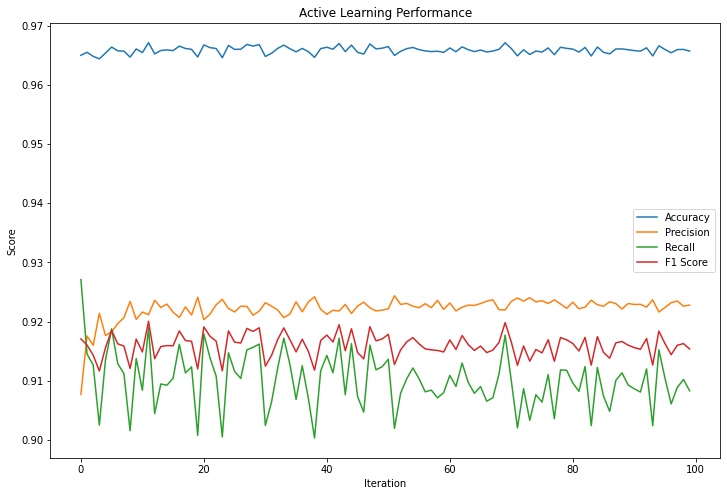

CPU times: total: 32min 24s
Wall time: 41min 17s
Parser   : 125 ms


In [19]:
%%time
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Begin active learning
num_iter = 100  # number of iterations for active learning
num_samples = int(len(data) * 0.002)  # 0.2% of the data to add at each iteration

# Shuffle data
data = data.sample(frac=1, random_state=1)

# Sort data based on 'ambiguity' column and reset index
data_ambiguity_sort = data.sort_values(by='ambiguity', ascending=True).reset_index(drop=True)

# Copy the original training data
scaled_data_train_active = scaled_data_train.copy()
data_train_active = data_train.copy()

# Initialize model
sgd_model = SGDClassifier(loss='hinge', alpha=0.0001, penalty='l1', random_state=1)

# Initialize lists to store metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for i in tqdm(range(num_iter), desc="Active Learning Iterations"):
    # Fit the model on the current training data
    sgd_model.fit(scaled_data_train_active, data_train_active['class'])

    # Select the most ambiguous data samples
    most_ambiguous_data = data_ambiguity_sort.iloc[:num_samples]
    most_ambiguous_data.head()

    # Remove these samples from the global data
    data_ambiguity_sort = data_ambiguity_sort.iloc[num_samples:]

    # Add the most ambiguous data to the training data
    data_train_active = pd.concat([data_train_active, most_ambiguous_data])
    scaled_data_train_active = np.concatenate([scaled_data_train_active, scaler.transform(most_ambiguous_data[columns_to_cluster])])

    # Evaluate the model's performance on the test data
    y_pred_test = sgd_model.predict(scaled_data_test)
    accuracy, precision, recall, f1 = evaluate_performance_active(data_test['class'], y_pred_test)
    print(f"Performance on test data: Accuracy={accuracy:.3f}, Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}\n")

    # Store metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Plot metrics
plt.figure(figsize=(12, 8))
plt.plot(range(num_iter), accuracy_list, label='Accuracy')
plt.plot(range(num_iter), precision_list, label='Precision')
plt.plot(range(num_iter), recall_list, label='Recall')
plt.plot(range(num_iter), f1_list, label='F1 Score')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.title('Active Learning Performance')
plt.show()


juste du bruit, pas significatif

aléatoire

Active Learning Iterations:   1%|          | 1/100 [00:24<40:12, 24.37s/it]

Performance on test data: Accuracy=0.965, Precision=0.908, Recall=0.927, F1=0.917



Active Learning Iterations:   2%|▏         | 2/100 [00:58<48:49, 29.90s/it]

Performance on test data: Accuracy=0.966, Precision=0.921, Recall=0.911, F1=0.916



Active Learning Iterations:   3%|▎         | 3/100 [01:29<49:26, 30.59s/it]

Performance on test data: Accuracy=0.965, Precision=0.920, Recall=0.911, F1=0.915



Active Learning Iterations:   4%|▍         | 4/100 [02:01<49:39, 31.03s/it]

Performance on test data: Accuracy=0.965, Precision=0.921, Recall=0.909, F1=0.915



Active Learning Iterations:   5%|▌         | 5/100 [02:31<48:41, 30.76s/it]

Performance on test data: Accuracy=0.966, Precision=0.921, Recall=0.911, F1=0.916



Active Learning Iterations:   6%|▌         | 6/100 [03:05<49:44, 31.75s/it]

Performance on test data: Accuracy=0.967, Precision=0.921, Recall=0.917, F1=0.919



Active Learning Iterations:   7%|▋         | 7/100 [03:40<50:53, 32.83s/it]

Performance on test data: Accuracy=0.967, Precision=0.923, Recall=0.914, F1=0.918



Active Learning Iterations:   8%|▊         | 8/100 [04:12<49:59, 32.60s/it]

Performance on test data: Accuracy=0.965, Precision=0.925, Recall=0.898, F1=0.911



Active Learning Iterations:   9%|▉         | 9/100 [04:42<48:27, 31.95s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.912, F1=0.917



Active Learning Iterations:  10%|█         | 10/100 [05:14<47:59, 32.00s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.908, F1=0.916



Active Learning Iterations:  11%|█         | 11/100 [05:46<47:21, 31.93s/it]

Performance on test data: Accuracy=0.966, Precision=0.922, Recall=0.914, F1=0.918



Active Learning Iterations:  12%|█▏        | 12/100 [06:18<46:47, 31.90s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.909, F1=0.916



Active Learning Iterations:  13%|█▎        | 13/100 [06:54<48:06, 33.18s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.908, F1=0.916



Active Learning Iterations:  14%|█▍        | 14/100 [07:27<47:29, 33.14s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.908, F1=0.915



Active Learning Iterations:  15%|█▌        | 15/100 [08:01<47:06, 33.26s/it]

Performance on test data: Accuracy=0.965, Precision=0.923, Recall=0.906, F1=0.914



Active Learning Iterations:  16%|█▌        | 16/100 [08:35<47:08, 33.67s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.910, F1=0.917



Active Learning Iterations:  17%|█▋        | 17/100 [09:10<47:04, 34.03s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.910, F1=0.916



Active Learning Iterations:  18%|█▊        | 18/100 [09:45<46:51, 34.29s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.911, F1=0.917



Active Learning Iterations:  19%|█▉        | 19/100 [10:19<45:55, 34.02s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.910, F1=0.916



Active Learning Iterations:  20%|██        | 20/100 [10:57<47:03, 35.30s/it]

Performance on test data: Accuracy=0.967, Precision=0.922, Recall=0.914, F1=0.918



Active Learning Iterations:  21%|██        | 21/100 [11:30<45:36, 34.64s/it]

Performance on test data: Accuracy=0.967, Precision=0.921, Recall=0.916, F1=0.918



Active Learning Iterations:  22%|██▏       | 22/100 [12:05<45:17, 34.84s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.912, F1=0.917



Active Learning Iterations:  23%|██▎       | 23/100 [13:02<53:18, 41.53s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.909, F1=0.916



Active Learning Iterations:  24%|██▍       | 24/100 [14:10<1:02:21, 49.23s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.907, F1=0.915



Active Learning Iterations:  25%|██▌       | 25/100 [15:08<1:05:03, 52.04s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.911, F1=0.917



Active Learning Iterations:  26%|██▌       | 26/100 [16:20<1:11:30, 57.98s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.911, F1=0.917



Active Learning Iterations:  27%|██▋       | 27/100 [17:34<1:16:28, 62.86s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.909, F1=0.916



Active Learning Iterations:  28%|██▊       | 28/100 [18:26<1:11:18, 59.43s/it]

Performance on test data: Accuracy=0.967, Precision=0.923, Recall=0.914, F1=0.918



Active Learning Iterations:  29%|██▉       | 29/100 [19:12<1:05:39, 55.49s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.910, F1=0.917



Active Learning Iterations:  30%|███       | 30/100 [19:51<58:59, 50.57s/it]  

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.912, F1=0.917



Active Learning Iterations:  31%|███       | 31/100 [20:24<52:10, 45.37s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.910, F1=0.916



Active Learning Iterations:  32%|███▏      | 32/100 [21:02<48:48, 43.06s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.909, F1=0.916



Active Learning Iterations:  33%|███▎      | 33/100 [21:44<47:39, 42.67s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.909, F1=0.917



Active Learning Iterations:  34%|███▍      | 34/100 [22:28<47:32, 43.21s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.909, F1=0.916



Active Learning Iterations:  35%|███▌      | 35/100 [23:07<45:15, 41.78s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.907, F1=0.915



Active Learning Iterations:  36%|███▌      | 36/100 [23:44<43:07, 40.42s/it]

Performance on test data: Accuracy=0.967, Precision=0.922, Recall=0.915, F1=0.918



Active Learning Iterations:  37%|███▋      | 37/100 [24:22<41:48, 39.82s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.909, F1=0.916



Active Learning Iterations:  38%|███▊      | 38/100 [25:01<40:39, 39.35s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.913, F1=0.918



Active Learning Iterations:  39%|███▉      | 39/100 [25:43<41:01, 40.35s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.912, F1=0.918



Active Learning Iterations:  40%|████      | 40/100 [26:20<39:11, 39.19s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.910, F1=0.916



Active Learning Iterations:  41%|████      | 41/100 [26:57<38:03, 38.70s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.912, F1=0.918



Active Learning Iterations:  42%|████▏     | 42/100 [27:34<36:56, 38.22s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.910, F1=0.917



Active Learning Iterations:  43%|████▎     | 43/100 [28:08<34:51, 36.70s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.910, F1=0.916



Active Learning Iterations:  44%|████▍     | 44/100 [28:46<34:46, 37.26s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.912, F1=0.918



Active Learning Iterations:  45%|████▌     | 45/100 [29:27<35:16, 38.48s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.911, F1=0.917



Active Learning Iterations:  46%|████▌     | 46/100 [30:02<33:28, 37.20s/it]

Performance on test data: Accuracy=0.967, Precision=0.923, Recall=0.916, F1=0.919



Active Learning Iterations:  47%|████▋     | 47/100 [30:49<35:37, 40.33s/it]

Performance on test data: Accuracy=0.967, Precision=0.923, Recall=0.913, F1=0.918



Active Learning Iterations:  48%|████▊     | 48/100 [31:37<36:52, 42.55s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.912, F1=0.917



Active Learning Iterations:  49%|████▉     | 49/100 [32:17<35:24, 41.66s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.910, F1=0.917



Active Learning Iterations:  50%|█████     | 50/100 [33:03<35:59, 43.20s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.910, F1=0.917



Active Learning Iterations:  51%|█████     | 51/100 [33:45<34:52, 42.71s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.908, F1=0.916



Active Learning Iterations:  52%|█████▏    | 52/100 [34:25<33:32, 41.93s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.910, F1=0.917



Active Learning Iterations:  53%|█████▎    | 53/100 [35:16<34:50, 44.48s/it]

Performance on test data: Accuracy=0.967, Precision=0.924, Recall=0.912, F1=0.918



Active Learning Iterations:  54%|█████▍    | 54/100 [36:03<34:43, 45.29s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.909, F1=0.916



Active Learning Iterations:  55%|█████▌    | 55/100 [36:48<33:54, 45.22s/it]

Performance on test data: Accuracy=0.967, Precision=0.922, Recall=0.914, F1=0.918



Active Learning Iterations:  56%|█████▌    | 56/100 [37:29<32:11, 43.91s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.907, F1=0.915



Active Learning Iterations:  57%|█████▋    | 57/100 [38:34<36:04, 50.34s/it]

Performance on test data: Accuracy=0.967, Precision=0.923, Recall=0.913, F1=0.918



Active Learning Iterations:  58%|█████▊    | 58/100 [39:12<32:38, 46.63s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.912, F1=0.918



Active Learning Iterations:  59%|█████▉    | 59/100 [39:54<30:52, 45.18s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.912, F1=0.917



Active Learning Iterations:  60%|██████    | 60/100 [40:32<28:41, 43.04s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.908, F1=0.916



Active Learning Iterations:  61%|██████    | 61/100 [41:21<29:15, 45.02s/it]

Performance on test data: Accuracy=0.967, Precision=0.922, Recall=0.916, F1=0.919



Active Learning Iterations:  62%|██████▏   | 62/100 [42:00<27:12, 42.97s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.907, F1=0.915



Active Learning Iterations:  63%|██████▎   | 63/100 [42:52<28:12, 45.75s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.910, F1=0.917



Active Learning Iterations:  64%|██████▍   | 64/100 [43:31<26:18, 43.86s/it]

Performance on test data: Accuracy=0.967, Precision=0.923, Recall=0.913, F1=0.918



Active Learning Iterations:  65%|██████▌   | 65/100 [44:08<24:20, 41.74s/it]

Performance on test data: Accuracy=0.967, Precision=0.922, Recall=0.915, F1=0.919



Active Learning Iterations:  66%|██████▌   | 66/100 [45:10<27:02, 47.72s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.910, F1=0.917



Active Learning Iterations:  67%|██████▋   | 67/100 [45:51<25:06, 45.65s/it]

Performance on test data: Accuracy=0.967, Precision=0.922, Recall=0.915, F1=0.919



Active Learning Iterations:  68%|██████▊   | 68/100 [46:29<23:06, 43.33s/it]

Performance on test data: Accuracy=0.967, Precision=0.923, Recall=0.913, F1=0.918



Active Learning Iterations:  69%|██████▉   | 69/100 [47:18<23:19, 45.14s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.912, F1=0.917



Active Learning Iterations:  70%|███████   | 70/100 [48:24<25:44, 51.49s/it]

Performance on test data: Accuracy=0.967, Precision=0.923, Recall=0.915, F1=0.919



Active Learning Iterations:  71%|███████   | 71/100 [49:18<25:17, 52.33s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.912, F1=0.918



Active Learning Iterations:  72%|███████▏  | 72/100 [50:03<23:22, 50.11s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.911, F1=0.917



Active Learning Iterations:  73%|███████▎  | 73/100 [51:04<23:57, 53.25s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.912, F1=0.918



Active Learning Iterations:  74%|███████▍  | 74/100 [52:03<23:50, 55.02s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.911, F1=0.917



Active Learning Iterations:  75%|███████▌  | 75/100 [53:09<24:15, 58.21s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.909, F1=0.916



Active Learning Iterations:  76%|███████▌  | 76/100 [54:18<24:37, 61.55s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.912, F1=0.918



Active Learning Iterations:  77%|███████▋  | 77/100 [55:23<23:57, 62.52s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.910, F1=0.917



Active Learning Iterations:  78%|███████▊  | 78/100 [56:04<20:35, 56.17s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.907, F1=0.915



Active Learning Iterations:  79%|███████▉  | 79/100 [57:12<20:52, 59.67s/it]

Performance on test data: Accuracy=0.967, Precision=0.924, Recall=0.913, F1=0.918



Active Learning Iterations:  80%|████████  | 80/100 [58:24<21:05, 63.28s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.910, F1=0.917



Active Learning Iterations:  81%|████████  | 81/100 [59:08<18:13, 57.54s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.913, F1=0.918



Active Learning Iterations:  82%|████████▏ | 82/100 [59:57<16:30, 55.00s/it]

Performance on test data: Accuracy=0.967, Precision=0.923, Recall=0.913, F1=0.918



Active Learning Iterations:  83%|████████▎ | 83/100 [1:00:57<16:01, 56.57s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.909, F1=0.916



Active Learning Iterations:  84%|████████▍ | 84/100 [1:01:44<14:18, 53.64s/it]

Performance on test data: Accuracy=0.967, Precision=0.923, Recall=0.913, F1=0.918



Active Learning Iterations:  85%|████████▌ | 85/100 [1:02:45<13:56, 55.79s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.910, F1=0.917



Active Learning Iterations:  86%|████████▌ | 86/100 [1:03:38<12:50, 55.06s/it]

Performance on test data: Accuracy=0.967, Precision=0.923, Recall=0.913, F1=0.918



Active Learning Iterations:  87%|████████▋ | 87/100 [1:04:26<11:28, 52.97s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.911, F1=0.917



Active Learning Iterations:  88%|████████▊ | 88/100 [1:05:11<10:06, 50.56s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.909, F1=0.916



Active Learning Iterations:  89%|████████▉ | 89/100 [1:06:03<09:20, 50.92s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.911, F1=0.917



Active Learning Iterations:  90%|█████████ | 90/100 [1:07:15<09:31, 57.13s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.912, F1=0.918



Active Learning Iterations:  91%|█████████ | 91/100 [1:08:23<09:03, 60.44s/it]

Performance on test data: Accuracy=0.967, Precision=0.923, Recall=0.914, F1=0.919



Active Learning Iterations:  92%|█████████▏| 92/100 [1:09:09<07:29, 56.13s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.910, F1=0.917



Active Learning Iterations:  93%|█████████▎| 93/100 [1:09:57<06:15, 53.62s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.913, F1=0.918



Active Learning Iterations:  94%|█████████▍| 94/100 [1:11:04<05:46, 57.78s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.910, F1=0.917



Active Learning Iterations:  95%|█████████▌| 95/100 [1:11:54<04:36, 55.37s/it]

Performance on test data: Accuracy=0.967, Precision=0.923, Recall=0.913, F1=0.918



Active Learning Iterations:  96%|█████████▌| 96/100 [1:12:59<03:52, 58.15s/it]

Performance on test data: Accuracy=0.966, Precision=0.923, Recall=0.912, F1=0.917



Active Learning Iterations:  97%|█████████▋| 97/100 [1:13:48<02:47, 55.69s/it]

Performance on test data: Accuracy=0.967, Precision=0.923, Recall=0.913, F1=0.918



Active Learning Iterations:  98%|█████████▊| 98/100 [1:14:56<01:58, 59.17s/it]

Performance on test data: Accuracy=0.966, Precision=0.924, Recall=0.910, F1=0.917



Active Learning Iterations:  99%|█████████▉| 99/100 [1:16:09<01:03, 63.31s/it]

Performance on test data: Accuracy=0.967, Precision=0.923, Recall=0.913, F1=0.918



Active Learning Iterations: 100%|██████████| 100/100 [1:17:15<00:00, 46.36s/it]

Performance on test data: Accuracy=0.967, Precision=0.923, Recall=0.912, F1=0.918



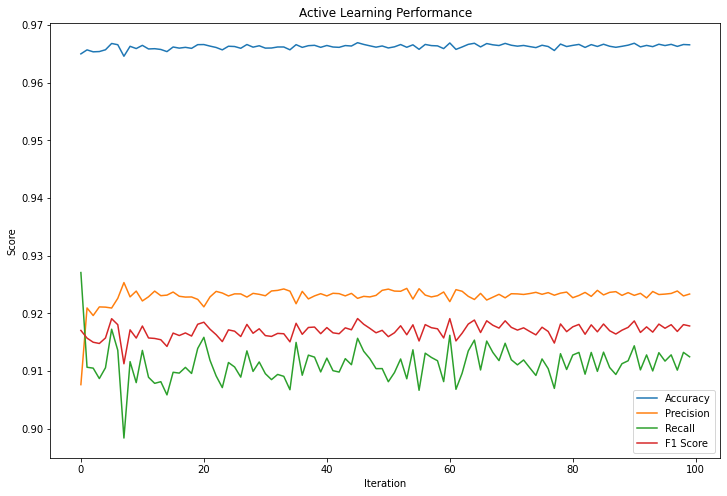

In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Begin active learning
num_iter = 100  # number of iterations for active learning
num_samples = int(len(data) * 0.002)  # 0.2% of the data to add at each iteration

# Shuffle data
data = data.sample(frac=1, random_state=1)

# Sort data based on 'ambiguity' column and reset index
data_ambiguity_sort = data.sort_values(by='ambiguity', ascending=False).reset_index(drop=True)

# Copy the original training data
scaled_data_train_active = scaled_data_train.copy()
data_train_active = data_train.copy()

# Initialize model
sgd_model = SGDClassifier(loss='hinge', alpha=0.0001, penalty='l1', random_state=1)

# Initialize lists to store metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

from sklearn.utils import shuffle

for i in tqdm(range(num_iter), desc="Active Learning Iterations"):
    # Fit the model on the current training data
    sgd_model.fit(scaled_data_train_active, data_train_active['class'])

    # Select the most ambiguous data samples randomly
    most_ambiguous_data = data_ambiguity_sort.sample(n=num_samples)
    
    # Remove these samples from the global data
    data_ambiguity_sort = data_ambiguity_sort.drop(most_ambiguous_data.index)
    
    # Add the most ambiguous data to the training data
    data_train_active = pd.concat([data_train_active, most_ambiguous_data])
    scaled_data_train_active = np.concatenate([scaled_data_train_active, scaler.transform(most_ambiguous_data[columns_to_cluster])])


    # Evaluate the model's performance on the test data
    y_pred_test = sgd_model.predict(scaled_data_test)
    accuracy, precision, recall, f1 = evaluate_performance_active(data_test['class'], y_pred_test)
    print(f"Performance on test data: Accuracy={accuracy:.3f}, Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}\n")

    # Store metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Plot metrics
plt.figure(figsize=(12, 8))
plt.plot(range(num_iter), accuracy_list, label='Accuracy')
plt.plot(range(num_iter), precision_list, label='Precision')
plt.plot(range(num_iter), recall_list, label='Recall')
plt.plot(range(num_iter), f1_list, label='F1 Score')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.title('Active Learning Performance')
plt.show()


sélection biaisé, priv. un cluster-> voir les nouveau résultats

les données -> dépendance aux variable , statistque (trop facile), 

contexte: annotation toujours, 

suite de projet : 

In [19]:
data.head()

patientid  reldatetime circulatory_state   class    vm1    vm3   vm4  \
0       6562    1017600.0            Stable  Stable  100.0  144.0  78.0   
1      12985      97500.0            Stable  Stable   79.0  109.0  64.0   
2      26926     162300.0            Stable  Stable  103.0  170.0  73.0   
3      30965     211800.0            Stable  Stable   76.0  130.0  70.0   
4       4332      93300.0            Stable  Stable   94.0  101.0  58.0   

     vm5   vm13   vm20  ...  vm146  vm172     vm174  vm176  pm41  pm42  pm43  \
0  101.0  5.300  100.0  ...    1.0   1.01  7.400000  117.0   0.0   0.0   0.0   
1   85.0  5.300   93.0  ...    1.0   1.09  5.700000    5.0   0.0   0.0   0.0   
2  107.0  5.375   99.0  ...    1.0   1.20  6.701671   76.0   0.0   0.0   0.0   
3   93.0  5.300   98.0  ...    1.0   1.02  7.990909  163.0   0.0   0.0   0.0   
4   73.0  5.200   96.0  ...    1.0   1.12  5.400000   15.0   0.0   0.0   0.0   

   pm44  pm87  ambiguity  
0   0.0   0.0   0.092056  
1   0.0   0.0   0.176841  
2   0.0   0.0   0.078743  
3   0.0   0.0   0.135801  
4   0.0   0.0   0.193210  

[5 rows x 23 columns]